# Échantillonnage

Toutes les transformations d'image que nous avons étudiées jusqu'à présent produisent des images de sortie de la même taille que les entrées.

Pour la mise en œuvre de diverses applications, nous voulons souvent changer la résolution d'une image.

Par exemple, nous pouvons avoir besoin de suréchantillonner pour augmenter la résolution d'une image afin qu'elle corresponde à celle d'une imprimante ou d'un moniteur, ou nous pouvons vouloir sous-échantillonner pour réduire la taille d'une image afin d'accélérer l'exécution d'un algorithme ou d'économiser de l'espace de stockage. ou le temps de transmission elle.


Dans ce cahier, nous traiterons d'abord des filtres pour changer la résolution de l'image, c'est-à-dire le suréchantillonnage (interpolation) et le sous-échantillonnage (décimation), puis nous traiterons des pyramides multi-résolutions, qui peuvent être utilisées pour créer une hiérarchie complète de différentes tailles d'image. et avec leurs applications.

## Échantillonnage d'images

L'idée de base du sous-échantillonnage d'image est de soustraire une par deux lignes et colonnes pour créer une image demi-taille.

![](https://drive.google.com/uc?id=1zsM7AvYWHmnDbaTj3NVEN7lf_-U74RA5)

Lorsque le taux d'échantillonnage devient trop faible, nous ne pouvons plus capturer les détails de l'image.

![](https://drive.google.com/uc?id=1VVRAu_BqzFiMAH5pfY7kplgUSY2r66Pe)

En utilisant le théorème d'échantillonnage de Shannon, la fréquence d'échantillonnage minimale sans convolutions (ondulations indésirables) doit être telle que : fs≥2fmax.

Par exemple, supposons que nous voulions échantillonner le motif sinusoïdal suivant.

![](https://drive.google.com/uc?id=1JtqnbkPhVu4Qn-jLAB5lDLAyN0vmqk0U)





## Suréchantillonnage (interpolation)
Pour interpoler une image à une résolution plus élevée, nous devons choisir un noyau d'interpolation $h$ :

$$g(i,j) = \sum_{k,l} f(k,l)h(i-rk, j-rl)$$

Cette formule est liée à la formule de convolution discrète, à l'exception que nous remplaçons $k$ et $l$ dans $h()$ par $rk$ et $rl$ , où $r$ est le taux d'échantillonnage.


*Quels cœurs sont les meilleurs pour l'interpolation ?*

La réponse dépend de l'application et du temps de calcul.
N'importe lequel des noyaux de lissage indiqués dans le tableau ci-dessous peut être utilisé après une mise à l'échelle appropriée.

Les noyaux de lissage dans la matrice ont une surface unitaire. Pour les transformer en noyaux d'interpolation, nous les incrémentons simplement du taux d'interpolation r.

![](https://drive.google.com/uc?id=1FrtyGWZwuTt1tVQ4cwKPG6VxvrmsKwVZ)

## Sous-échantillonnage (décimation)

La réduction de la résolution d'une image nécessite une décimation (sous-échantillonnage) effectuée en faisant convoluer l'image avec un filtre passe-bas (pour éviter le crénelage):

$$g(i,j) = \sum_{k,l} f(k,l)h(ri-k, rj-l)$$

où $h(k,l)$ est le noyau de lissage.

ou bien on peut écrire

$$g(i,j) =\frac{1}{r}\sum_{k,l} f(k,l)h(i-k/r, j-l/r)$$

et garder le même noyau $h(k,l)$ pour l'interpolation et la décimation.



### Exemple

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Pour effectuer un sous-échantillonnage sur l'image, nous utiliserons `cv2.resize` de la bibliothèque opencv où il prend en paramètre différentes méthodes d'interpolation ou de décimation.


```
void cv::resize(	
InputArray 	src,
OutputArray 	dst,
Size 	dsize,
double 	fx = 0,
double 	fy = 0,
int 	interpolation = INTER_LINEAR 
)
```
où

`dsize = Taille(rond(fx*src.cols), rond(fy*src.lignes))`

`fx facteur d'échelle le long de l'axe horizontal ; quand il est égal à 0, il est calculé comme
(double)dsize.width/src.cols`

`fy facteur d'échelle le long de l'axe vertical ; quand il est égal à 0, il est calculé comme
(double)dsize.height/src.rows`


Les méthodes préférées sont INTER_AREA pour le sous-échantillonnage et INTER_CUBIC (lent) et INTER_LINEAR pour le suréchantillonnage.

Par défaut, la méthode d'interpolation cv.INTER_LINEAR est utilisée à toutes les fins de redimensionnement d'image.

Vous pouvez redimensionner une image d'entrée en utilisant l'une des méthodes suivantes :

* INTER_NEAREST : interpolation du plus proche voisin
* INTER_LINEAR : interpolation bilinéaire
* INTER_CUBIC : interpolation bicubique
* INTER_AREA : rééchantillonnage à l'aide d'une relation de zone de pixels. Il peut s'agir d'une méthode préférée pour la décimation d'image, car elle donne des résultats sans moiré.
Mais lorsque l'image est agrandie, cela ressemble à la méthode INTER_NEAREST.
* INTER_LANCZOS4 : Interpolation de Lanczos sur le voisinage 8x8
* INTER_LINEAR_EXACT : Interpolation bilinéaire au bit près. Cela produira les mêmes résultats que la méthode du voisin le plus proche dans PIL, scikit-image ou Matlab.

Pour plus de détails, voir [εδώ](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

In [3]:
# Laissez le tableau suivant représenter une image que nous voulons illustrer
img = np.array([[3,106,107,40,148,112,254,151],
                [62,173,91,93,33,111,139,25],
                [99,137,80,231,101,204,74,219],
                [240,173,85,14,40,230,160,152],
                [230,200,177,149,173,239,103,74],
                [19,50,209,82,241,103,3,87],
                [252,191,55,154,171,107,6,123],
                [7,101,168,85,115,103,32,11]],dtype=np.uint8)


# Nous modifions la taille de la largeur et de la hauteur de l'image en deux et utilisons un autre type d'interférence
resized_AREA = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_AREA)
resized_NEAR = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_NEAREST)
resized_LIN = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LINEAR)
resized_CUB = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_CUBIC)
resized_LANC= cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LANCZOS4)
resized_LINEX = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_LINEAR_EXACT)


print("img",img)
print("INTER_AREA:\n",resized_AREA)

print("\nINTER_NEAREST:\n",resized_NEAR)
print("\nINTER_LINEAR:\n",resized_LIN)
print("\nINTER_CUBIC:\n",resized_CUB)
print("\nINTER_LANCZOS4:\n",resized_LANC)
print("\nINTER_LINEAR_EXACT:\n",resized_LINEX)

img [[  3 106 107  40 148 112 254 151]
 [ 62 173  91  93  33 111 139  25]
 [ 99 137  80 231 101 204  74 219]
 [240 173  85  14  40 230 160 152]
 [230 200 177 149 173 239 103  74]
 [ 19  50 209  82 241 103   3  87]
 [252 191  55 154 171 107   6 123]
 [  7 101 168  85 115 103  32  11]]
INTER_AREA:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]

INTER_NEAREST:
 [[  3 107 148 254]
 [ 99  80 101  74]
 [230 177 173 103]
 [252  55 171   6]]

INTER_LINEAR:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]

INTER_CUBIC:
 [[ 90  70  87 146]
 [169  96 149 153]
 [ 98 168 220  47]
 [161 105 130  37]]

INTER_LANCZOS4:
 [[ 92  53  77 148]
 [157 103 156 150]
 [ 71 179 236  43]
 [179 103 132  37]]

INTER_LINEAR_EXACT:
 [[ 86  83 101 142]
 [162 103 144 151]
 [125 154 189  67]
 [138 116 124  43]]


In [4]:
enlarged_AREA = cv2.resize(resized_AREA, (8, 8), interpolation=cv2.INTER_AREA)
print(enlarged_AREA)

[[ 86  86  83  83 101 101 142 142]
 [ 86  86  83  83 101 101 142 142]
 [162 162 103 103 144 144 151 151]
 [162 162 103 103 144 144 151 151]
 [125 125 154 154 189 189  67  67]
 [125 125 154 154 189 189  67  67]
 [138 138 116 116 124 124  43  43]
 [138 138 116 116 124 124  43  43]]


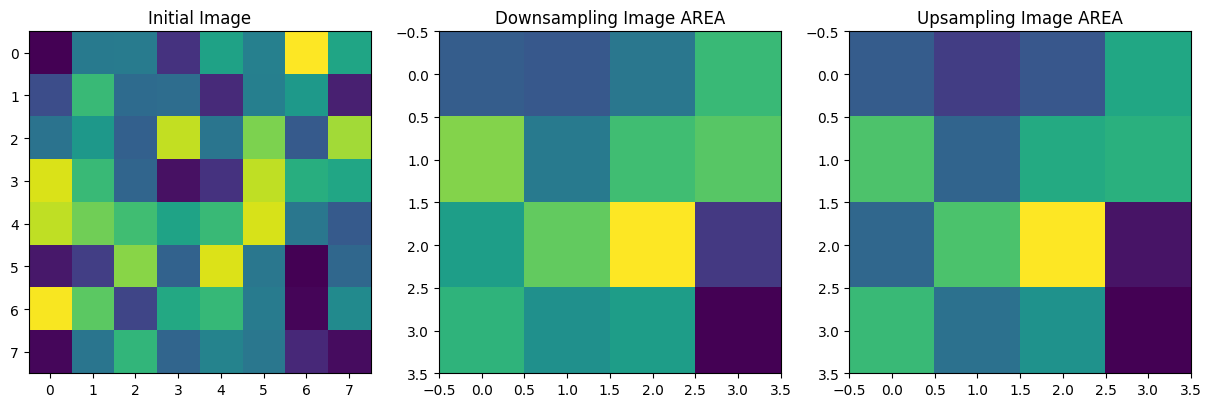

In [5]:
# Display traning image and testing image
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title("Initial Image")
plt.imshow(img)
plt.subplot(132)
plt.title("Downsampling Image AREA")
plt.imshow(resized_AREA)
plt.subplot(133)
plt.title("Upsampling Image AREA")
plt.imshow(enlarged_AREA)
plt.show()

### Exemple avec photo

In [6]:
from skimage import data
orig_image = data.astronaut()

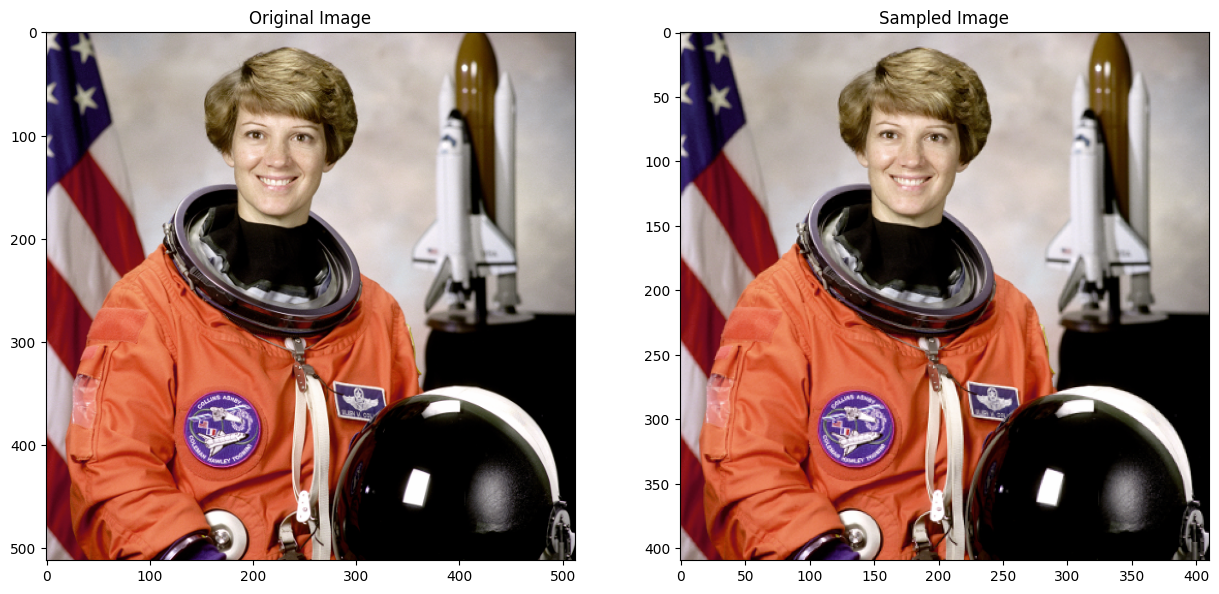

In [7]:
# Αλλάξτε τα fx, fy για πειραματισμό
res = cv2.resize(orig_image, None, fx=0.80, fy=0.80, interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(orig_image,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res,cmap = 'gray')
plt.title('Sampled Image')

plt.show()

#### Bibliographie

1. Traitement numérique des images - Gonzalez, Woods, section 4.5.4
2. Vision par ordinateur : algorithmes et applications, 2e édition, Richard Szeliski, section 3.5